In [2]:
import os
import kagglehub

try:
    # Download latest version
    path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

    print("Path to dataset files:", path)

    if os.path.exists(path):
        print("The directory exists!")
        if os.path.isdir(path):
            print("It is a directory.")
            # Further checks for files and subdirectories
        else:
            print("It is not a directory.")
    else:
        print("The directory does not exist. Dataset download failed or the path is incorrect.")

except Exception as e:
    print(f"An error occurred during download: {e}")

Path to dataset files: /kaggle/input/the-wildfire-dataset
The directory exists!
It is a directory.


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

GPU is Available!


In [5]:
train_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train"
test_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test"
val_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val"

In [6]:
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


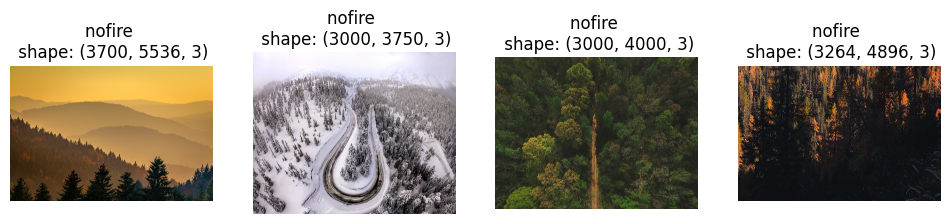

In [7]:
plt.figure(figsize=(12, 10))
for i in range(4):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 4, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

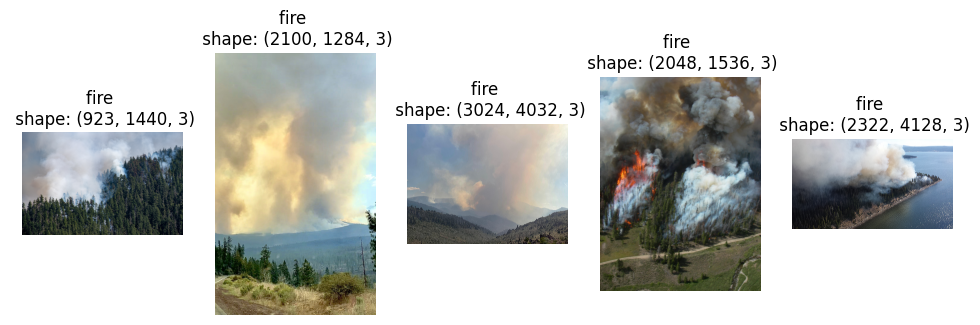

In [8]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()


In [9]:
img_width, img_height = 150, 150
batch_size = 32 # there will be 32 images in a batch!

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [10]:
class_mapping = train_generator.class_indices
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [11]:
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)